## Importing Required Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon

## Work directory

In [2]:
work_dir = "../Data/"

## Reading file

In [3]:
df = gpd.read_file(work_dir + "updated_input_file.shp")

## Checking top 5 values 

In [4]:
df.head()

,DST_ID,DISTRICT,STATE,POPULATION,EDUCATION%,geometry
0,1,Gilgit,JAMMU AND KASHMIR,43004,1,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,26649,92,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,3,Ladakh,JAMMU AND KASHMIR,50114,48,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,53004,45,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,5,Kupwara,JAMMU AND KASHMIR,35111,70,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."


## Checking all columns

In [5]:
df.columns

Index(['DST_ID', 'DISTRICT', 'STATE', 'POPULATION', 'EDUCATION%', 'geometry'], dtype='object')

## Checking all values of 'STATE' column

In [6]:
df['STATE'].unique()

array(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'UTTAR PRADESH',
       'HARYANA', 'CHANDIGARH', 'RAJASTHAN', 'ARUNACHAL PRADESH', 'DELHI',
       'ASSAM', 'SIKKIM', 'BIHAR', 'WEST BENGAL', 'NAGALAND',
       'MADHYA PRADESH', 'MEGHALAYA', 'MANIPUR', 'GUJARAT', 'TRIPURA',
       'MIZORAM', 'ORISSA', 'MAHARASHTRA', 'DAMAN AND DIU',
       'DADRA AND NAGAR HAVELI', 'ANDHRA PRADESH', 'KARNATAKA',
       'PONDICHERRY', 'GOA', 'ANDAMAN AND NICOBAR ISLANDS', 'TAMIL NADU',
       'KERALA', 'LAKSHADWEEP'], dtype=object)

## Filtering only 'MAHARASHTRA' value from 'STATE' column

In [7]:
maha_df = df[df['STATE'] == 'MAHARASHTRA']

## Exporting the GeoDataFrame to a shapefile

In [8]:
maha_df.to_file(work_dir + "MAHARASHTRA_file.shp", driver='ESRI Shapefile')

##  Exporting Shapefile as geoJSON file 

In [9]:
maha_df.to_file('../Data/MAHARASHTRA_file.geojson', driver='GeoJSON')

## Visualizing 'MAHARASHTRA' map

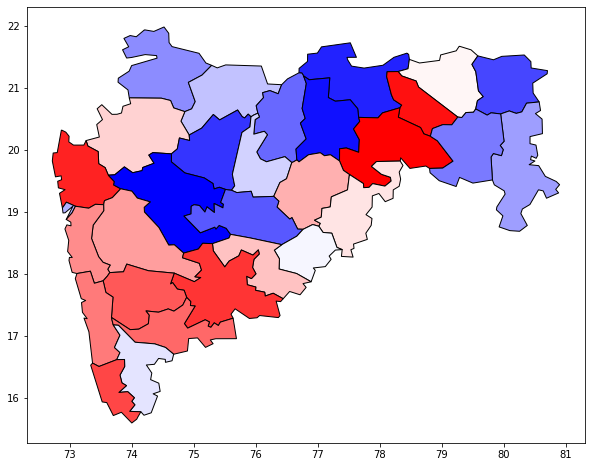

In [10]:
maha_df.plot(column = 'DISTRICT',cmap = "bwr",facecolor = '#00000050',edgecolor = 'black', figsize = (10,10))

## Creating a DataFrame for my current location

In [11]:
Latitude: 21.902008
Longitude: 77.907822

In [12]:
city_df = pd.DataFrame([{'DST_ID' : 999, 'DISTRICT' : 'house', 'STATE': 'MADHYA PRADESH', 'POPULATION': 3,
                         'EDUCATION%' : 100,'Latitude': 21.902008, 'Longitude':  77.907822}])

## Creating a Point geometry column from the Latitude and Longitude columns

In [13]:
geometry = [Point(xy) for xy in zip(city_df.Longitude, city_df.Latitude)]

## Converting Pandas DataFrame to a GeoPandas DataFrame

In [14]:
gdf = gpd.GeoDataFrame(city_df, geometry=geometry)

In [15]:
gdf

,DST_ID,DISTRICT,STATE,POPULATION,EDUCATION%,Latitude,Longitude,geometry
0,999,house,MADHYA PRADESH,3,100,21.902008,77.907822,POINT (77.90782 21.90201)


## Dropping 'Latitude', 'Longitude' columns

In [16]:
gdf = gdf.drop(['Latitude', 'Longitude'],axis=1)

## Appending both DataFrames

In [17]:
gdf = gdf.append(df)

In [18]:
city_df = df[df['DISTRICT'] == 'Betul']

## Merging current location with 'MAHARASHTRA' map

In [19]:
maha_df1 = maha_df.merge(city_df, how = 'outer')

## Map Before Merging

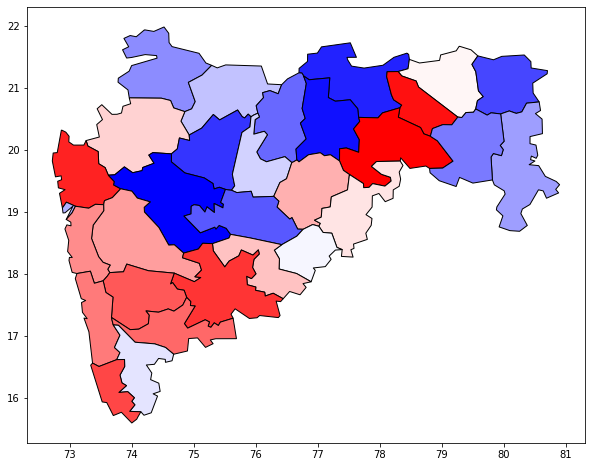

In [30]:
maha_df.plot(column = 'DISTRICT',cmap = "bwr",facecolor = '#00000099',edgecolor = 'black', figsize = (10,10))

## Map After Merging

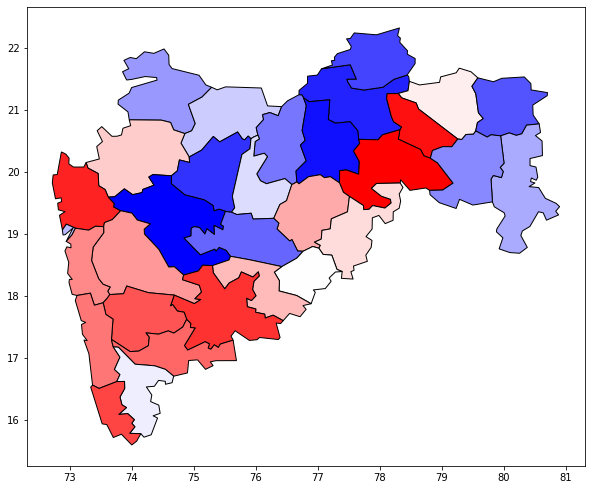

In [29]:
maha_df1.plot(column = 'DISTRICT',cmap = "bwr",facecolor = '#00000099',edgecolor = 'black', figsize = (10,10))

## Saving file as JPEG to compare both images

(15.59935, 21.98129)

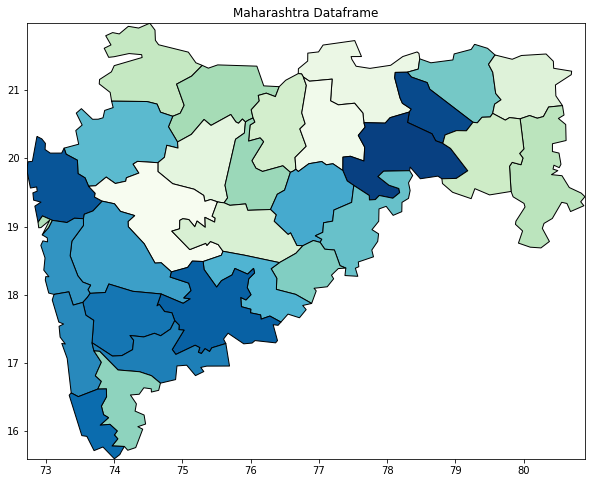

In [32]:
fig2, ax = plt.subplots(figsize=(10, 10))
maha_df.plot(ax=ax,column = 'DISTRICT',cmap = "GnBu",facecolor = '#00000099',edgecolor = 'black', figsize = (10,10))
ax.set_title('Maharashtra Dataframe')
ax.set_xlim(maha_df.total_bounds[0], maha_df.total_bounds[2])
ax.set_ylim(maha_df.total_bounds[1], maha_df.total_bounds[3])

In [25]:
fig2.savefig(work_dir + '..\Output\maha_df.jpeg', dpi=300, bbox_inches='tight')

(15.59935, 22.31936)

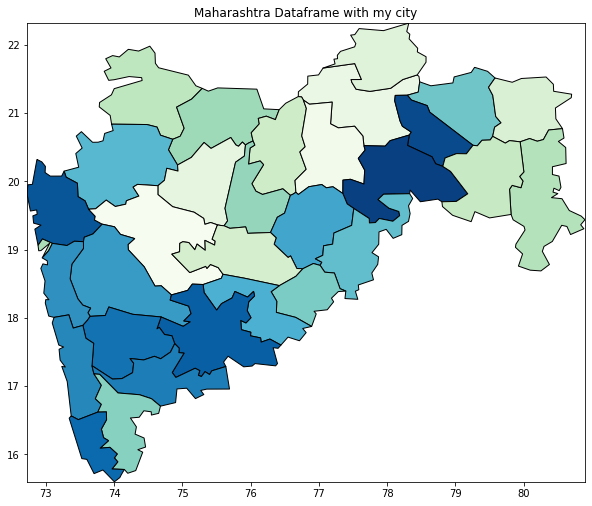

In [31]:
fig1, ax = plt.subplots(figsize=(10, 10))
maha_df1.plot(ax=ax,column = 'DISTRICT',cmap = "GnBu",facecolor = '#00000099',edgecolor = 'black', figsize = (10,10))
ax.set_title('Maharashtra Dataframe with my city')
ax.set_xlim(maha_df1.total_bounds[0], maha_df1.total_bounds[2])
ax.set_ylim(maha_df1.total_bounds[1], maha_df1.total_bounds[3])

In [23]:
fig1.savefig(work_dir + '..\Output\maha&my_city_df.jpeg', dpi=300, bbox_inches='tight')